In [144]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
import matplotlib.pyplot as plt

In [5]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

## EDA

In [7]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,202.000000,165.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.831683,121.836364,98.848020,174.273267,65.903960,53.775248,2558.173267,126.945545,10.160990,25.148515,30.658416,13253.752475
std,1.258360,35.396412,6.094523,12.334330,2.106915,2.444769,517.236654,41.455269,3.995264,6.421956,6.809940,7954.919591
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,8.600000,19.000000,25.000000,7778.250000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.000000,9.000000,24.000000,30.000000,10320.000000
75%,2.000000,150.000000,102.400000,183.500000,66.825000,55.500000,2932.750000,141.000000,9.400000,30.000000,34.000000,16502.250000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [10]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [11]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [12]:
df['normalized-losses'].isnull().sum()

37

In [13]:
df['normalized-losses'].value_counts().sum()

165

In [18]:
mean_normal = df['normalized-losses'].mean()
mean_normal

121.83636363636364

In [24]:
df['normalized-losses'].fillna(mean_normal, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13032\3317859858.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].fillna(mean_normal, inplace=True)


In [26]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [28]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      86
Name: count, dtype: int64

## Filling Null Values

In [30]:
most_common = df['num-of-doors'].mode()
print(most_common)

0    four
Name: num-of-doors, dtype: object


In [32]:
df['num-of-doors'].fillna('four',inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_13032\4280607531.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].fillna('four',inplace = True)


In [34]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

New Column Addition

## Object to Integer

In [37]:
print(df['horsepower'].dtype)

object


In [39]:
print(df['curb-weight'].dtype)

int64


In [41]:
df['horsepower'] = pd.to_numeric(df['horsepower'],errors = 'coerce')
df['horsepower'].fillna(df['horsepower'].mean(),inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_13032\605049350.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(),inplace = True)


In [43]:
df['horsepower'] = df['horsepower'].astype(int)

In [45]:
df['h_to_w_ratio'] = df['horsepower'] / df['curb-weight']

In [47]:
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'],errors = 'coerce')
df['peak-rpm'].fillna(df['peak-rpm'].mean(),inplace = True)
df['peak-rpm'] = df['peak-rpm'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_13032\3986296295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['peak-rpm'].fillna(df['peak-rpm'].mean(),inplace = True)


## LabelEncoding

In [50]:
encoder = OrdinalEncoder()

In [52]:
cat_cols = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'engine-location','fuel-system','engine-type','num-of-cylinders','engine-type','num-of-cylinders','drive-wheels','peak-rpm']
df[cat_cols] = encoder.fit_transform(df[cat_cols])

## StandardScaling

In [55]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('price')
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [57]:
numeric_cols

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'compression-ratio',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'h_to_w_ratio'],
      dtype='object')

In [59]:
x = df[cat_cols + numeric_cols.tolist()]

In [61]:
y = df['price']

## Model Training

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

## Linear Regression

In [67]:
linear_model = LinearRegression()

In [69]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [71]:
l_prediction = linear_model.predict(x_test)

In [73]:
linear_model.score(x_train,y_train)

0.9021311114143614

In [75]:
linear_model.score(x_test,y_test)

0.8247890856636402

In [77]:
linear_mse = mean_squared_error(y_test, l_prediction)
print(linear_mse)

15715284.263920933


In [79]:
linear_r2 = r2_score(y_test, l_prediction)
print(linear_r2)

0.8247890856636402


## KNN - Regressor

In [82]:
knn_r = KNeighborsRegressor(n_neighbors = 3)

In [84]:
knn_r.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [86]:
knn_prediction = knn_r.predict(x_test)
knn_prediction

array([ 6927.66666667, 23336.66666667,  6678.33333333,  7395.33333333,
       11026.33333333,  6520.        , 23839.33333333,  9818.        ,
        9687.33333333, 21230.        , 20134.        ,  8205.66666667,
       12555.66666667,  8194.33333333, 18153.33333333, 19296.66666667,
        7863.        ,  7261.33333333,  9327.66666667, 34690.        ,
       27918.33333333, 24535.        ,  9620.        ,  6979.66666667,
       18829.        , 11412.33333333,  8824.66666667, 18829.        ,
       13323.33333333,  7949.        , 13974.33333333,  5782.66666667,
       12145.        ,  6788.33333333, 12555.66666667, 16301.66666667,
        6169.66666667,  7949.        , 12555.66666667,  8624.33333333,
       14107.33333333, 13599.33333333,  9046.33333333,  6843.33333333,
       10616.        , 19296.66666667,  5688.66666667,  7199.66666667,
        7789.        ,  7249.        , 19225.        , 12259.        ,
       13915.        , 12813.        ,  6843.33333333,  6520.        ,
      

In [87]:
knn_r.score(x_train,y_train)

0.8696521277391858

In [90]:
knn_r.score(x_test,y_test)

0.7128595304134442

In [92]:
knn_r_mse = mean_squared_error(y_test,knn_prediction)
print(knn_r_mse)

25754640.459016394


In [94]:
knn_r_r2 = r2_score(y_test,knn_prediction)
print(knn_r_r2)

0.7128595304134442


## Random Forest Regressor

In [97]:
rfr = RandomForestRegressor()

In [99]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [100]:
rfr_prediction = rfr.predict(x_test)

In [103]:
rfr.score(x_train,y_train)

0.9850352771498293

In [105]:
rfr.score(x_test,y_test)

0.9257467291240864

In [107]:
rfr_mse = mean_squared_error(y_test,rfr_prediction)
print(rfr_mse)

6660037.496869259


In [114]:
rfr_r2 = r2_score(y_test,rfr_prediction)
rfr_r2

0.9257467291240864

## Accuracy Scores

In [110]:
print('Linear Regression Score :',linear_r2)

Linear Regression Score : 0.8247890856636402


In [112]:
print('KNN Regression Score :', knn_r_r2)

KNN Regression Score : 0.7128595304134442


In [116]:
print('Random Forest Regression :',rfr_r2)

Random Forest Regression : 0.9257467291240864


## Visualization

In [152]:
x = ['Linear Regression(0.824)','KNeighborsRegressor(0.712)','Random Forest Regression(0.925)']
y = [0.8247890856636402,0.7128595304134442,0.9257467291240864]
color = ['red','blue','green']

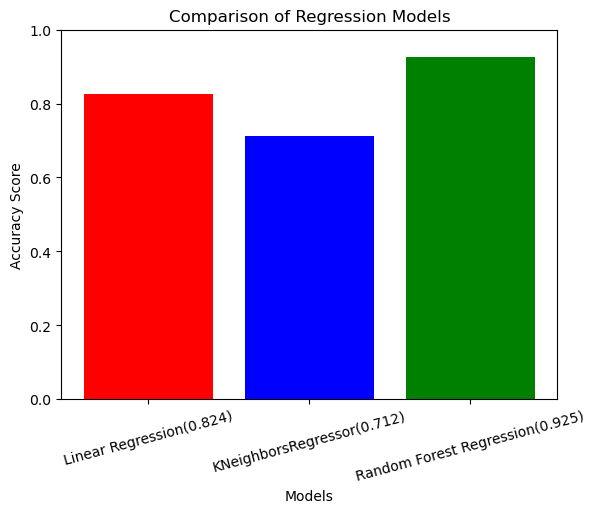

In [162]:
plt.bar(x, y, color=color)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Regression Models')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.xticks(rotation=15)
plt.show()